In [13]:
import torch
import pandas as pd 
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(torch.cuda.get_device_name())

NVIDIA GeForce GTX 1650


In [4]:
print(torch.__version__, DEVICE)

1.12.0 cuda


In [5]:
BATCH_SIZE = 32
EPOCHS = 30 

In [8]:
train_dataset = datasets.MNIST(root='../../data/MNIST/',
                               download=True,
                               train=True,
                               transform=transforms.ToTensor())

test_dataset = datasets.MNIST(root='../../data/MNIST/',
                              download=True,
                              train=False,
                              transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          shuffle=False,
                                          batch_size=BATCH_SIZE)


In [9]:
for (X_train, y_train) in train_loader:
    print(X_train.size(), y_train.size())
    print(X_train.type(), y_train.type())
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.FloatTensor torch.LongTensor


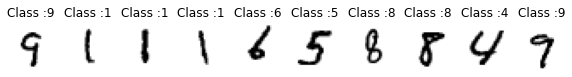

In [12]:
pltsize= 1
plt.figure(figsize=(pltsize*10, pltsize))
for i in range(10):
    plt.subplot(1, 10 ,i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class :' + str(y_train[i].item()))


In [42]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 28* 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x


In [62]:
del model

In [63]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.5)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [64]:
def train(model, train_loader, optimizer, log_interval=100):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        output = model(image)
        optimizer.zero_grad()
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f'Train_Epoch: {Epoch}, [{batch_idx*len(image)} / {len(train_loader.dataset)}({(100. *batch_idx / len(train_loader)):.0f}%]\tTrain_Loss ; {(loss.item()):.6f}')




In [65]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    test_loss = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss /= len(test_loader)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [66]:
best_accuracy = 0
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model
    print(f'\n[EPOCH: {Epoch}, \tTest_loss : {(test_loss):.4f}, \tTest_accuracy : {(test_accuracy):.2f}%\n')


C:\Users\Admin\AppData\Local\Temp\ipykernel_3976\2108691685.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train_Epoch: 1, [0 / 60000(0%]	Train_Loss ; 2.316052
Train_Epoch: 1, [3200 / 60000(5%]	Train_Loss ; 2.182207
Train_Epoch: 1, [6400 / 60000(11%]	Train_Loss ; 1.927364
Train_Epoch: 1, [9600 / 60000(16%]	Train_Loss ; 1.516931
Train_Epoch: 1, [12800 / 60000(21%]	Train_Loss ; 0.850173
Train_Epoch: 1, [16000 / 60000(27%]	Train_Loss ; 0.780806
Train_Epoch: 1, [19200 / 60000(32%]	Train_Loss ; 0.656368
Train_Epoch: 1, [22400 / 60000(37%]	Train_Loss ; 0.386519
Train_Epoch: 1, [25600 / 60000(43%]	Train_Loss ; 0.672741
Train_Epoch: 1, [28800 / 60000(48%]	Train_Loss ; 0.450741
Train_Epoch: 1, [32000 / 60000(53%]	Train_Loss ; 0.455507
Train_Epoch: 1, [35200 / 60000(59%]	Train_Loss ; 0.463340
Train_Epoch: 1, [38400 / 60000(64%]	Train_Loss ; 0.323001
Train_Epoch: 1, [41600 / 60000(69%]	Train_Loss ; 0.293447
Train_Epoch: 1, [44800 / 60000(75%]	Train_Loss ; 0.333297
Train_Epoch: 1, [48000 / 60000(80%]	Train_Loss ; 0.247876
Train_Epoch: 1, [51200 / 60000(85%]	Train_Loss ; 0.453338
Train_Epoch: 1, [54400 

In [67]:
print(best_accuracy, best_model.state_dict())

98.17 OrderedDict([('fc1.weight', tensor([[-7.5899e-05, -1.7329e-02,  2.9495e-02,  ..., -2.3345e-02,
          2.8946e-02, -2.2269e-02],
        [-3.5383e-02, -5.9891e-03,  3.2126e-02,  ...,  2.2320e-03,
         -1.6744e-02,  1.7532e-02],
        [ 3.3040e-02, -1.6697e-02, -2.0733e-02,  ..., -2.1317e-03,
         -3.4657e-02,  4.7622e-03],
        ...,
        [ 3.0991e-02,  3.4051e-02,  2.9256e-02,  ..., -1.1826e-02,
          3.2236e-02, -3.5086e-02],
        [ 1.9918e-02,  4.9862e-03,  1.2175e-03,  ...,  2.0819e-02,
         -7.8109e-03, -2.5359e-02],
        [-2.3862e-02, -3.5468e-02,  2.1325e-02,  ..., -1.0364e-02,
         -6.5366e-03, -5.6773e-03]], device='cuda:0')), ('fc1.bias', tensor([-7.7873e-02, -4.6205e-02,  3.8034e-02,  5.3612e-02,  2.1900e-02,
         8.7030e-02, -3.2439e-02, -7.2824e-02,  2.6272e-02,  3.7349e-03,
         4.4609e-02,  6.3178e-02, -3.7934e-03,  4.2325e-03, -3.2951e-02,
         2.0851e-03, -8.7217e-02,  2.3843e-02,  5.3513e-03, -2.1503e-02,
        -7